# Project 8 - Final

You are a data scientist in healthcare. Your manager gives you two Coronavirus tweets datasets. The training dataset contains in the file: Corona_NLP_train.csv Download Corona_NLP_train.csv. The test dataset contains in the file: Corona_NLP_test.csv Download Corona_NLP_test.csv. Both have the following columns:

- UserName
- ScreenName
- Location
- TweetAt
- OriginalTweet
- Sentiment

Data source: Corona_NLP_train.csvLinks to an external site. / Corona NLP test.csvLinks to an external site. (Kaggle, 2021)

 

**Steps and Questions**

You are asked to perform the following tasks:

1. Concatenate the following three columns into a new column of Tweet_texts:
- Location
- TweetAt
- OriginalTweet

2. Clean and preprocess the new column of Tweet_texts:

- 2.1 Remove the date and time in the tweets using a regular expression.
- 2.2 Remove the hyperlink URL in the tweets using a regular expression.
- 2.3 Remove the Twitter hashtags(# before a relevant keyword or phrase ) in the tweets using a regular     expression.
- 2.4 Remove the usernames (also known as the handle –– begins with the “@” symbol) using a regular expression.
- 2.5 Remove all special characters, punctuation using a regular expression.
- 2.6 Remove all words containing at most two characters such as "a", "an", "in", "on", etc.
- 2.7 Remove all rows without any text left (empty text) in the column of Tweet_texts.
- 2.8 Perform the part of speech tagging for the texts.
- 2.9 Visualize the dependency parser.
- 2.10 Perform the named entities recognition for the texts.
- 2.11 Visualize the GEOLOCATION, MONEY, ORDINAL, and QUANTITY in the texts.

3. Extract all the tokens from the Tweet_texts.

4. Replace the Tweet_texts column with the string only containing the lemmas of all the tokens.

5. Graphically summarize the Sentiment.

6. Graphically summarize the length of the text of the Tweet_texts using.
    - histogram
    - boxplot
    - density plot
    
7. Graphically summarize the word count of the text of the Tweet_texts using
    - histogram
    - boxplot
    - density plot

8. Graphically summarize the top 10 unigram and bigrams of the tf-idf of the text of the Tweet_texts.

9. Visualize the top 10 term frequency of the tokens associated with positive tweets using scattertext.

10. Visualize the top 10 positive scores of the tokens associated with positive tweets using scattertext.

11. Convert the column of the Tweet_texts to a matrix of token counts using CountVectorizer and unigrams and bigrams.

12. Perform the tf-idf analysis on the column of the Tweet_texts using Tfidfvectorizer.

13. Find the cosine similarity in Tweet_texts between the 200th and 20,000th tweets.

14. Find the corpus vector equal to the average of all the document vectors, where each document corresponds to a tweet or a row in this dataset.

For steps 15 to 20, we want to forecast Sentiment using Tweet_texts.

15. Build the first model based on the training dataset using the random forests and pipeline.
16. Check the first model on the test dataset. Is it a good model based on the selected evaluation metrics? Please justify your answer.
17. Create the second model using pipeline, grid search CV for the hyperparameters for the estimators. (Please see all the potential parameters at Scikit Learn's TfidVectorizerLinks to an external site. and random forestsLinks to an external site..)
18. Tune the second model and perform model diagnostics on the test dataset. Is it a good model? Please justify your answer.
19. Build the third model using pipeline, grid search CV, hyperparameter for the following classifiers:
    - Logistic Regression
    - Random Forest
    - Support Vector Machine

20. Tune the third model and perform model diagnostics on the test dataset. Is it a good model? Please justify your answer.
21. Generate the first topic model by setting five topics using LDA method and CountVectorizer.
22. Plot the top 15 words for each topic for the model above.
23. Generate the second topic model by setting five topics using LDA method and TfidfVectorizer.
24. Plot the top 15 words for each topic for the second model above.
25. Visualize the second topic model using the dimension reduction method.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

In [3]:
import os
os.environ["PYTHONWARNINGS"] = "ignore"

In [4]:
import IPython
IPython.get_ipython().run_line_magic("config", "Application.log_level = 'CRITICAL'")

## Load Necessary Libraries

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import re
import string
import nltk
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import scattertext as st
import pyLDAvis
import pyLDAvis.sklearn

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import (TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation

# Set stopwords
stop_words = set(stopwords.words('english'))

# Enable pyLDAvis display in Jupyter Notebook
pyLDAvis.enable_notebook()

In [6]:
# Load dataset

df_train = pd.read_csv("/Users/matthewmoore/Downloads/Corona_NLP_train.csv", encoding = 'ISO-8859-1')

df_test = pd.read_csv("/Users/matthewmoore/Downloads/Corona_NLP_test.csv", encoding = 'ISO-8859-1')

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
df_train.info()

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 1. Concatenate the following three columns into a new column of Tweet_texts: Location, TweetAt, OriginalTweet

In [9]:
# Concatenate the three columns for the training dataset
df_train["Tweet_texts"] = (
    df_train["Location"].fillna("").astype(str) + " " +
    df_train["TweetAt"].fillna("").astype(str) + " " +
    df_train["OriginalTweet"].fillna("").astype(str)
)

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Concatenate the three columns for the test dataset
df_test["Tweet_texts"] = (
    df_test["Location"].fillna("").astype(str) + " " +
    df_test["TweetAt"].fillna("").astype(str) + " " +
    df_test["OriginalTweet"].fillna("").astype(str)
)

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Preview of Concatenate on training data
df_train[["Location", "TweetAt", "OriginalTweet", "Tweet_texts"]].head()

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Location,TweetAt,OriginalTweet,Tweet_texts
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,London 16-03-2020 @MeNyrbie @Phil_Gahan @Chris...
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,UK 16-03-2020 advice Talk to your neighbours f...
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Vagabonds 16-03-2020 Coronavirus Australia: Wo...
3,NaN,16-03-2020,My food stock is not the only one which is emp...,16-03-2020 My food stock is not the only one ...
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...","16-03-2020 Me, ready to go at supermarket dur..."


In [12]:
df_train.head(5)

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet_texts
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London 16-03-2020 @MeNyrbie @Phil_Gahan @Chris...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,UK 16-03-2020 advice Talk to your neighbours f...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds 16-03-2020 Coronavirus Australia: Wo...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,16-03-2020 My food stock is not the only one ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"16-03-2020 Me, ready to go at supermarket dur..."


In [13]:
# Preview of Concatenate on test data
df_test[["Location", "TweetAt", "OriginalTweet", "Tweet_texts"]].head()

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Location,TweetAt,OriginalTweet,Tweet_texts
0,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,NYC 02-03-2020 TRENDING: New Yorkers encounter...
1,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,"Seattle, WA 02-03-2020 When I couldn't find ha..."
2,NaN,02-03-2020,Find out how you can protect yourself and love...,02-03-2020 Find out how you can protect yours...
3,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Chicagoland 02-03-2020 #Panic buying hits #New...
4,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,"Melbourne, Victoria 03-03-2020 #toiletpaper #d..."


In [14]:
df_test.head(5)

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Tweet_texts
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,NYC 02-03-2020 TRENDING: New Yorkers encounter...
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,"Seattle, WA 02-03-2020 When I couldn't find ha..."
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,02-03-2020 Find out how you can protect yours...
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,Chicagoland 02-03-2020 #Panic buying hits #New...
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,"Melbourne, Victoria 03-03-2020 #toiletpaper #d..."


## 2. Clean and preprocess the new column of Tweet_texts:

    - 2.1 Remove the date and time in the tweets using a regular expression.
    - 2.2 Remove the hyperlink URL in the tweets using a regular expression.
    - 2.3 Remove the Twitter hashtags(# before a relevant keyword or phrase ) in the tweets using a regular expression.
    - 2.4 Remove the usernames (also known as the handle –– begins with the “@” symbol) using a regular expression.
    - 2.5 Remove all special characters, punctuation using a regular expression.
    - 2.6 Remove all words containing at most two characters such as "a", "an", "in", "on", etc.
    - 2.7 Remove all rows without any text left (empty text) in the column of Tweet_texts.

In [15]:
from spacy.lang.en.stop_words import STOP_WORDS

# Load spaCy's small model
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    # 2.1 Remove date/time
    text = re.sub(r"\b\d{2}-\d{2}-\d{4}\b", "", text)
    
    # 2.2 Remove hyperlink URLs
    text = re.sub(r"(http|https)://\S+", "", text)
    
    # 2.3 Remove Twitter hashtags (#someTag)
    text = re.sub(r"#\S+", "", text)
    
    # 2.4 Remove usernames (@someUser)
    text = re.sub(r"@\S+", "", text)
    
    # 2.5 Remove all special characters/punctuation (keep letters, digits, spaces)
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)
    
    # Convert to lowercase and strip leading/trailing whitespace
    text = text.lower().strip()
    
    # 2.6 Remove all words with at most two characters
    tokens = [w for w in text.split() if len(w) > 2]
    text = " ".join(tokens)
    
    return text


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
df_train["Tweet_texts"] = df_train["Tweet_texts"].apply(clean_text)

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
df_test["Tweet_texts"]  = df_test["Tweet_texts"].apply(clean_text)

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
df_train = df_train[df_train["Tweet_texts"].str.strip().astype(bool)]
df_test  = df_test[df_test["Tweet_texts"].str.strip().astype(bool)]

print("Training data size:", df_train.shape)
print("Test data size:", df_test.shape)


Training data size: (41138, 7)
Test data size: (3798, 7)


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 2. Clean and preprocess the new column of Tweet_texts:

    - 2.8 Perform the part of speech tagging for the texts.
    - 2.9 Visualize the dependency parser.
    - 2.10 Perform the named entities recognition for the texts.
    - 2.11 Visualize the GEOLOCATION, MONEY, ORDINAL, and QUANTITY in the texts.

In [19]:
# Sample Set
train_sample = df_train["Tweet_texts"].head(10).tolist()
test_sample  = df_test["Tweet_texts"].head(10).tolist()

print("=== POS Tagging on Training Sample ===")
for i, text in enumerate(train_sample):
    doc = nlp(text)
    print(f"\n--- Training Tweet {i} ---")
    for token in doc:
        print(f"{token.text} -> {token.pos_} ({token.tag_})")

print("\n=== POS Tagging on Test Sample ===")
for j, text in enumerate(test_sample):
    doc = nlp(text)
    print(f"\n--- Test Tweet {j} ---")
    for token in doc:
        print(f"{token.text} -> {token.pos_} ({token.tag_})")


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


=== POS Tagging on Training Sample ===

--- Training Tweet 0 ---
london -> PROPN (NNP)
and -> CCONJ (CC)
and -> CCONJ (CC)

--- Training Tweet 1 ---
advice -> NOUN (NN)
talk -> VERB (VBP)
your -> PRON (PRP$)
neighbours -> PROPN (NNP)
family -> NOUN (NN)
exchange -> NOUN (NN)
phone -> NOUN (NN)
numbers -> NOUN (NNS)
create -> VERB (VBP)
contact -> NOUN (NN)
list -> NOUN (NN)
with -> ADP (IN)
phone -> NOUN (NN)
numbers -> NOUN (NNS)
neighbours -> VERB (VBD)
schools -> NOUN (NNS)
employer -> NOUN (NN)
chemist -> NOUN (NN)
set -> VERB (VBD)
online -> ADJ (JJ)
shopping -> NOUN (NN)
accounts -> VERB (VBZ)
poss -> NOUN (NN)
adequate -> ADJ (JJ)
supplies -> VERB (VBZ)
regular -> ADJ (JJ)
meds -> NOUN (NNS)
but -> CCONJ (CC)
not -> PART (RB)
over -> ADP (IN)
order -> NOUN (NN)

--- Training Tweet 2 ---
vagabonds -> NOUN (NNS)
coronavirus -> PROPN (NNP)
australia -> PROPN (NNP)
woolworths -> NOUN (NNS)
give -> VERB (VBP)
elderly -> ADJ (JJ)
disabled -> ADJ (JJ)
dedicated -> ADJ (JJ)
shopping -> 

In [20]:
from spacy import displacy

# Example
train_text_example = df_train["Tweet_texts"].iloc[0]
test_text_example  = df_test["Tweet_texts"].iloc[0]

doc_train = nlp(train_text_example)
doc_test  = nlp(test_text_example)

print("=== Dependency Parse (Training Example) ===")
displacy.render(doc_train, style="dep", jupyter=True, options={"distance": 100})

print("=== Dependency Parse (Test Example) ===")
displacy.render(doc_test, style="dep", jupyter=True, options={"distance": 100})


=== Dependency Parse (Training Example) ===


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


=== Dependency Parse (Test Example) ===


In [21]:
print("=== NER on a small Training sample ===")
for i, text in enumerate(train_sample):
    doc = nlp(text)
    ents = [(ent.text, ent.label_) for ent in doc.ents]
    print(f"\nTweet {i}: {text}")
    print("Entities:", ents)

print("\n=== NER on a small Test sample ===")
for j, text in enumerate(test_sample):
    doc = nlp(text)
    ents = [(ent.text, ent.label_) for ent in doc.ents]
    print(f"\nTweet {j}: {text}")
    print("Entities:", ents)


=== NER on a small Training sample ===

Tweet 0: london and and
Entities: [('london', 'GPE')]

Tweet 1: advice talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds but not over order
Entities: []

Tweet 2: vagabonds coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid19 outbreak
Entities: [('australia', 'GPE'), ('covid19', 'ORG')]

Tweet 3: food stock not the only one which empty please dont panic there will enough food for everyone you not take more than you need stay calm stay safe
Entities: []

Tweet 4: ready supermarket during the outbreak not because paranoid but because food stock litteraly empty the serious thing but please dont panic causes shortage
Entities: [('ready supermarket', 'PERSON')]

Tweet 5: 3631970882363649 news the regions first confirmed covid19 case came out sullivan county last week people

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
def show_specific_entities(doc):
    found_any = False
    for ent in doc.ents:
        if ent.label_ in ["GPE", "LOC", "MONEY", "ORDINAL", "QUANTITY"]:
            print(f"  Text: '{ent.text}' | Label: {ent.label_}")
            found_any = True
    if not found_any:
        print("  No matching entities found in this tweet.")

# Sample Set of 10
train_sample_texts = df_train["Tweet_texts"].head(10).tolist()
test_sample_texts  = df_test["Tweet_texts"].head(10).tolist()

print("=== Specific Entities in TRAINING sample (10 tweets) ===")
for i, text in enumerate(train_sample_texts):
    doc_train = nlp(text)
    print(f"\nTweet {i}: {text}")
    show_specific_entities(doc_train)

print("\n=== Specific Entities in TEST sample (10 tweets) ===")
for j, text in enumerate(test_sample_texts):
    doc_test = nlp(text)
    print(f"\nTweet {j}: {text}")
    show_specific_entities(doc_test)

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


=== Specific Entities in TRAINING sample (10 tweets) ===

Tweet 0: london and and
  Text: 'london' | Label: GPE

Tweet 1: advice talk your neighbours family exchange phone numbers create contact list with phone numbers neighbours schools employer chemist set online shopping accounts poss adequate supplies regular meds but not over order
  No matching entities found in this tweet.

Tweet 2: vagabonds coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid19 outbreak
  Text: 'australia' | Label: GPE

Tweet 3: food stock not the only one which empty please dont panic there will enough food for everyone you not take more than you need stay calm stay safe
  No matching entities found in this tweet.

Tweet 4: ready supermarket during the outbreak not because paranoid but because food stock litteraly empty the serious thing but please dont panic causes shortage
  No matching entities found in this tweet.

Tweet 5: 3631970882363649 news the regions first conf

## 3. Extract all the tokens from the Tweet_texts.

In [23]:
nlp = spacy.load("en_core_web_sm")

def extract_tokens(text):
    """
    Return a list of raw token strings from the given text.
    """
    doc = nlp(text)
    return [token.text for token in doc]

# Apply to TRAINING data
df_train["tokens"] = df_train["Tweet_texts"].apply(extract_tokens)

# Apply to TEST data
df_test["tokens"] = df_test["Tweet_texts"].apply(extract_tokens)

# Validation Check
print("\n === TRAINING data sample (tokens) ===")

display(df_train[["Tweet_texts", "tokens"]].head())

print("\n === TEST data sample (tokens) ===")

display(df_test[["Tweet_texts", "tokens"]].head())

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



 === TRAINING data sample (tokens) ===


,Tweet_texts,tokens
0,london and and,"[london, and, and]"
1,advice talk your neighbours family exchange ph...,"[advice, talk, your, neighbours, family, excha..."
2,vagabonds coronavirus australia woolworths giv...,"[vagabonds, coronavirus, australia, woolworths..."
3,food stock not the only one which empty please...,"[food, stock, not, the, only, one, which, empt..."
4,ready supermarket during the outbreak not beca...,"[ready, supermarket, during, the, outbreak, no..."



 === TEST data sample (tokens) ===


,Tweet_texts,tokens
0,nyc trending new yorkers encounter empty super...,"[nyc, trending, new, yorkers, encounter, empty..."
1,seattle when couldnt find hand sanitizer fred ...,"[seattle, when, could, nt, find, hand, sanitiz..."
2,find out how you can protect yourself and love...,"[find, out, how, you, can, protect, yourself, ..."
3,chicagoland buying hits city anxious shoppers ...,"[chicagoland, buying, hits, city, anxious, sho..."
4,melbourne victoria one week everyone buying ba...,"[melbourne, victoria, one, week, everyone, buy..."


## 4. Replace the Tweet_texts column with the string only containing the lemmas of all the tokens.

In [24]:
# Define Lemma String
def lemma_string(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    return " ".join(lemmas)

# Replace Tweet_texts in TRAINING data
df_train["Tweet_texts"] = df_train["Tweet_texts"].apply(lemma_string)

# Replace Tweet_texts in TEST data
df_test["Tweet_texts"] = df_test["Tweet_texts"].apply(lemma_string)

# Validation Check
print("TRAINING data after replacing Tweet_texts with lemmas")
display(df_train[["Tweet_texts", "tokens"]].head())

print("\nTEST data after replacing Tweet_texts with lemmas")
display(df_test[["Tweet_texts", "tokens"]].head())


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TRAINING data after replacing Tweet_texts with lemmas


,Tweet_texts,tokens
0,london and and,"[london, and, and]"
1,advice talk your neighbours family exchange ph...,"[advice, talk, your, neighbours, family, excha..."
2,vagabond coronavirus australia woolworth give ...,"[vagabonds, coronavirus, australia, woolworths..."
3,food stock not the only one which empty please...,"[food, stock, not, the, only, one, which, empt..."
4,ready supermarket during the outbreak not beca...,"[ready, supermarket, during, the, outbreak, no..."



TEST data after replacing Tweet_texts with lemmas


,Tweet_texts,tokens
0,nyc trend new yorker encounter empty supermark...,"[nyc, trending, new, yorkers, encounter, empty..."
1,seattle when could not find hand sanitizer fre...,"[seattle, when, could, nt, find, hand, sanitiz..."
2,find out how you can protect yourself and love...,"[find, out, how, you, can, protect, yourself, ..."
3,chicagoland buying hit city anxious shopper st...,"[chicagoland, buying, hits, city, anxious, sho..."
4,melbourne victoria one week everyone buy baby ...,"[melbourne, victoria, one, week, everyone, buy..."


## 5. Graphically summarize the Sentiment.

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


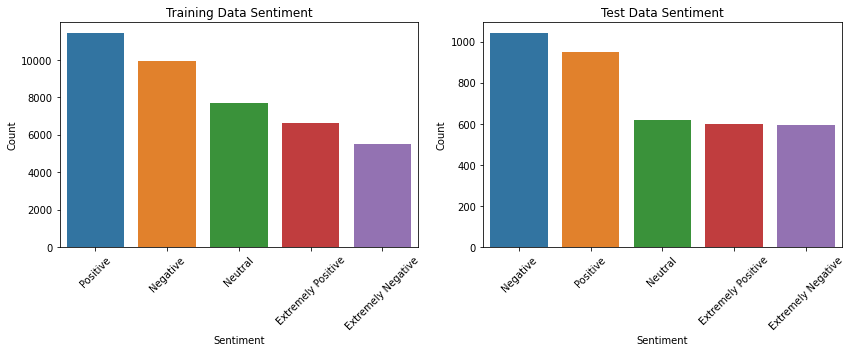

In [25]:
# Create a figure with 2 subplots (one for training, one for test)
fig, axes = plt.subplots(ncols=2, figsize=(12,5))

# Plot counts for TRAINING data
sns.countplot(data=df_train, x="Sentiment", ax=axes[0], order=df_train["Sentiment"].value_counts().index)
axes[0].set_title("Training Data Sentiment")
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45) 

# Plot counts for TEST data
sns.countplot(data=df_test, x="Sentiment", ax=axes[1], order=df_test["Sentiment"].value_counts().index)
axes[1].set_title("Test Data Sentiment")
axes[1].set_xlabel("Sentiment")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 6. Graphically summarize the length of the text of the Tweet_texts using.
    - histogram
    - boxplot
    - density plot

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


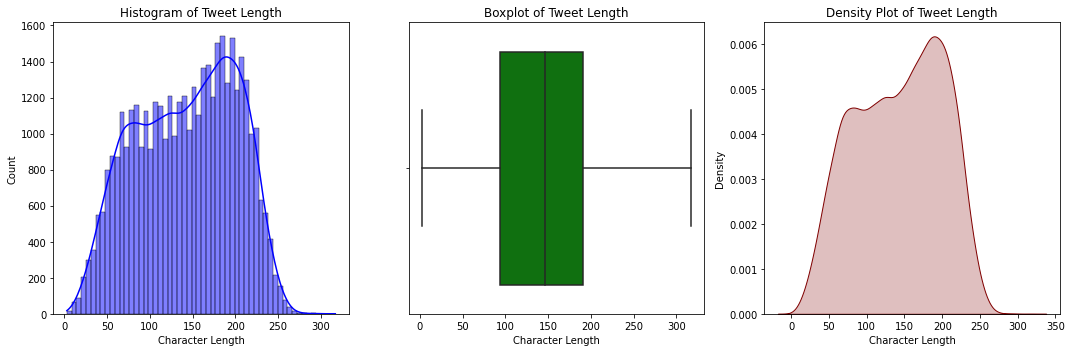

In [26]:
# Find the character length of each tweet (TRAINING)
df_train["char_len"] = df_train["Tweet_texts"].str.len()

plt.figure(figsize=(15,5))

# Histogram
plt.subplot(1,3,1)
sns.histplot(df_train["char_len"], kde=True, color='blue')
plt.title("Histogram of Tweet Length")
plt.xlabel("Character Length")
plt.ylabel("Count")

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=df_train["char_len"], color='green')
plt.title("Boxplot of Tweet Length")
plt.xlabel("Character Length")

# Density Plot
plt.subplot(1,3,3)
sns.kdeplot(df_train["char_len"], fill=True, color='maroon')
plt.title("Density Plot of Tweet Length")
plt.xlabel("Character Length")

plt.tight_layout()
plt.show()

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


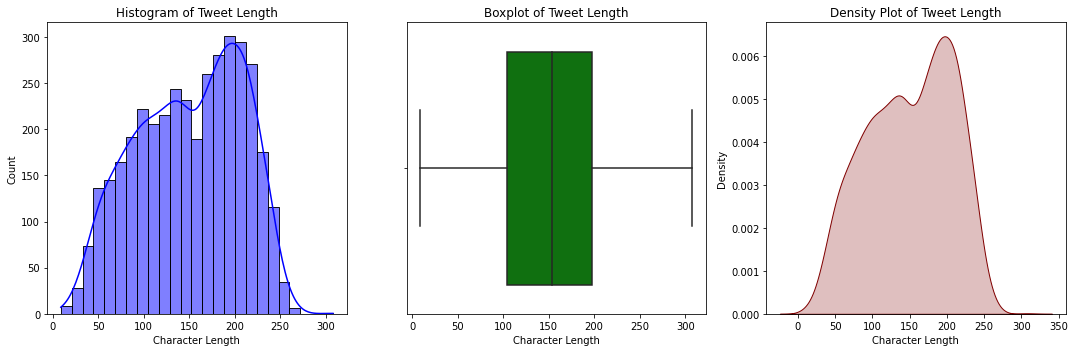

In [27]:
# Find the character length of each tweet (TEST)
df_test["char_len"] = df_test["Tweet_texts"].str.len()

plt.figure(figsize=(15,5))

# Histogram
plt.subplot(1,3,1)
sns.histplot(df_test["char_len"], kde=True, color='blue')
plt.title("Histogram of Tweet Length")
plt.xlabel("Character Length")
plt.ylabel("Count")

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=df_test["char_len"], color='green')
plt.title("Boxplot of Tweet Length")
plt.xlabel("Character Length")

# Density Plot
plt.subplot(1,3,3)
sns.kdeplot(df_test["char_len"], fill=True, color='maroon')
plt.title("Density Plot of Tweet Length")
plt.xlabel("Character Length")

plt.tight_layout()
plt.show()


## 7. Graphically summarize the word count of the text of the Tweet_texts using
    - histogram
    - boxplot
    - density plot

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


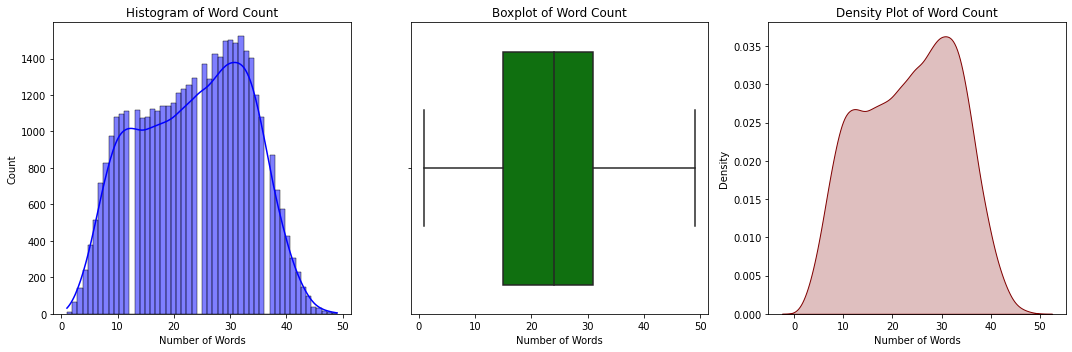

In [28]:
# Find the word count - TRAINING
df_train["word_count"] = df_train["Tweet_texts"].apply(lambda x: len(x.split()))

plt.figure(figsize=(15,5))

# Histogram
plt.subplot(1,3,1)
sns.histplot(df_train["word_count"], kde=True, color='blue')
plt.title("Histogram of Word Count")
plt.xlabel("Number of Words")
plt.ylabel("Count")

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=df_train["word_count"], color='green')
plt.title("Boxplot of Word Count")
plt.xlabel("Number of Words")

# Density Plot
plt.subplot(1,3,3)
sns.kdeplot(df_train["word_count"], fill=True, color='maroon')
plt.title("Density Plot of Word Count")
plt.xlabel("Number of Words")

plt.tight_layout()
plt.show()


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


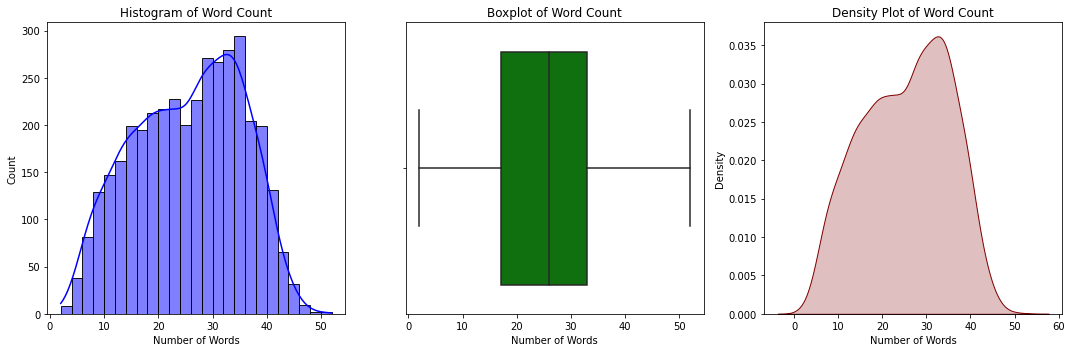

In [29]:
# Find the word count - TEST
df_test["word_count"] = df_test["Tweet_texts"].apply(lambda x: len(x.split()))

plt.figure(figsize=(15,5))

# Histogram
plt.subplot(1,3,1)
sns.histplot(df_test["word_count"], kde=True, color='blue')
plt.title("Histogram of Word Count")
plt.xlabel("Number of Words")
plt.ylabel("Count")

# Boxplot
plt.subplot(1,3,2)
sns.boxplot(x=df_test["word_count"], color='green')
plt.title("Boxplot of Word Count")
plt.xlabel("Number of Words")

# Density Plot
plt.subplot(1,3,3)
sns.kdeplot(df_test["word_count"], fill=True, color='maroon')
plt.title("Density Plot of Word Count")
plt.xlabel("Number of Words")

plt.tight_layout()
plt.show()

## 8. Graphically summarize the top 10 unigram and bigrams of the tf-idf of the text of the Tweet_texts.

In [30]:
vectorizer_unigram = TfidfVectorizer(ngram_range=(1,1), max_features=10000, stop_words='english')
X_unigram = vectorizer_unigram.fit_transform(df_train["Tweet_texts"])

# Sum the TF-IDF scores for each feature (unigram)
unigram_sums = X_unigram.sum(axis=0).A1  # convert to 1D array
unigram_vocab = vectorizer_unigram.get_feature_names_out()
unigram_scores = list(zip(unigram_vocab, unigram_sums))

# Descending Sort by TF-IDF filtering to top 10
top10_unigram = sorted(unigram_scores, key=lambda x: x[1], reverse=True)[:10]

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


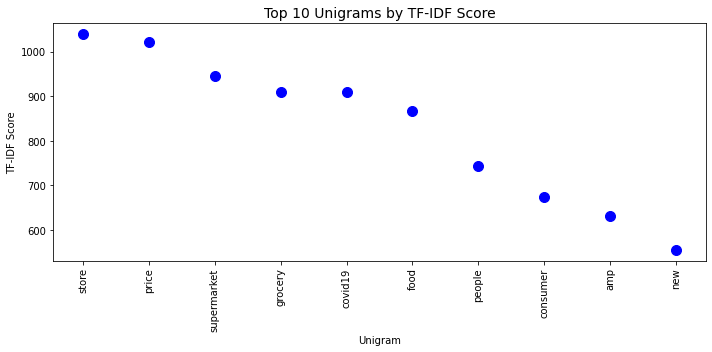

In [31]:
# Convert list of tuples to DataFrame
top10_unigram_df = pd.DataFrame(top10_unigram, columns=["unigram", "tfidf_sum"])

# Reset index
top10_unigram_df = top10_unigram_df.reset_index(drop=True)

# Create x-axis
x_positions = np.arange(len(top10_unigram_df))

# Visualize Top 10 Unigrams
plt.figure(figsize=(10,5))
plt.scatter(x_positions, top10_unigram_df["tfidf_sum"], color='blue', s=100)
plt.xticks(x_positions, top10_unigram_df["unigram"], rotation=90)
plt.title("Top 10 Unigrams by TF-IDF Score", fontsize=14)
plt.xlabel("Unigram")
plt.ylabel("TF-IDF Score")
plt.tight_layout()
plt.show()


In [32]:
vectorizer_bigram = TfidfVectorizer(ngram_range=(2,2), max_features=10000, stop_words='english')
X_bigram = vectorizer_bigram.fit_transform(df_train["Tweet_texts"])

# Sum the TF-IDF scores for each feature (bigram)
bigram_sums = X_bigram.sum(axis=0).A1
bigram_vocab = vectorizer_bigram.get_feature_names_out()
bigram_scores = list(zip(bigram_vocab, bigram_sums))

top10_bigram = sorted(bigram_scores, key=lambda x: x[1], reverse=True)[:10]

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


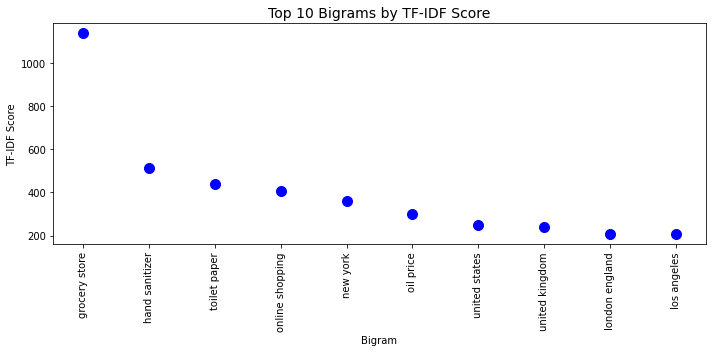

In [33]:
# Convert list of tuples to DataFrame
top10_bigram_df = pd.DataFrame(top10_bigram, columns=["bigram", "tfidf_sum"])

# Reset index
top10_bigram_df = top10_bigram_df.reset_index(drop=True)

# Create x-axis
x_positions = np.arange(len(top10_bigram_df))

# Visualize Top 10 Bigrams
plt.figure(figsize=(10,5))
plt.scatter(x_positions, top10_bigram_df["tfidf_sum"], color='blue', s=100)
plt.xticks(x_positions, top10_bigram_df["bigram"], rotation=90)
plt.title("Top 10 Bigrams by TF-IDF Score", fontsize=14)
plt.xlabel("Bigram")
plt.ylabel("TF-IDF Score")
plt.tight_layout()
plt.show()

## 9. Visualize the top 10 term frequency of the tokens associated with positive tweets using scattertext.

In [34]:
df_train["category"] = df_train["Sentiment"].apply(lambda x: "Positive" if x == "Positive" else "Non-Positive")

# Generate corpus
corpus_ac = st.CorpusFromPandas(df_train, 
                              category_col='category', 
                              text_col='Tweet_texts',
                              nlp=nlp).build()

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
term_freq_df_ac = corpus_ac.get_term_freq_df()

# Rank terms by descending order
term_freq_df_ac_freq = term_freq_df_ac.sort_values(by= 'Positive freq', ascending=False)

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


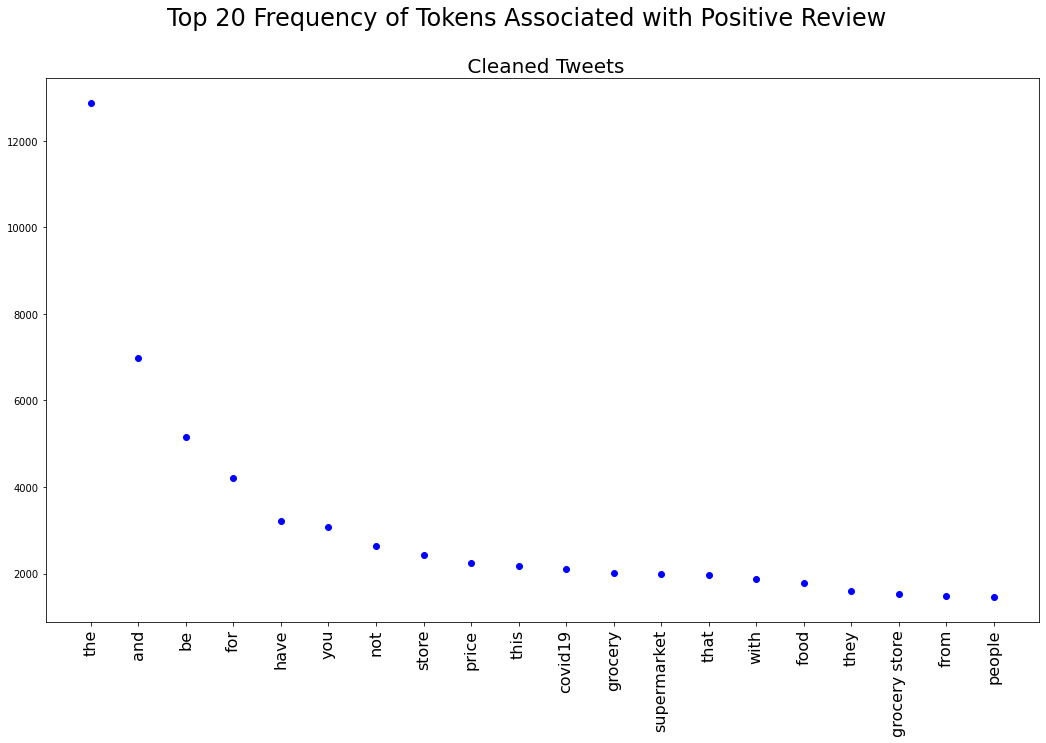

In [36]:
# Specify the top 20 tokens to visualize
top_n = 20
term_freq_df_ac_freq = term_freq_df_ac_freq.head(20)

x = range(0, top_n)

fig, ax = plt.subplots(figsize = (17.8, 10))

fig.suptitle('Top 20 Frequency of Tokens Associated with Positive Review', fontsize= 24)

# Plot x and tf using blue circle markers
ax.plot(x, term_freq_df_ac_freq["Positive freq"], 'bo')
ax.set_title(' Cleaned Tweets', fontsize= 20)
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
x_ticks_labels = term_freq_df_ac_freq.index
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

# Adjust horizontal space
fig.subplots_adjust(hspace=1.5)
plt.show()

## 10. Visualize the top 10 positive scores of the tokens associated with positive tweets using scattertext.

In [37]:
term_freq_df_ac_Score = term_freq_df_ac.sort_values(by= 'Positive freq', ascending=False)

# Create the positive score for the sentiment of positive review
term_freq_df_ac['Positive freq'] = corpus_ac.get_scaled_f_scores('Positive')

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


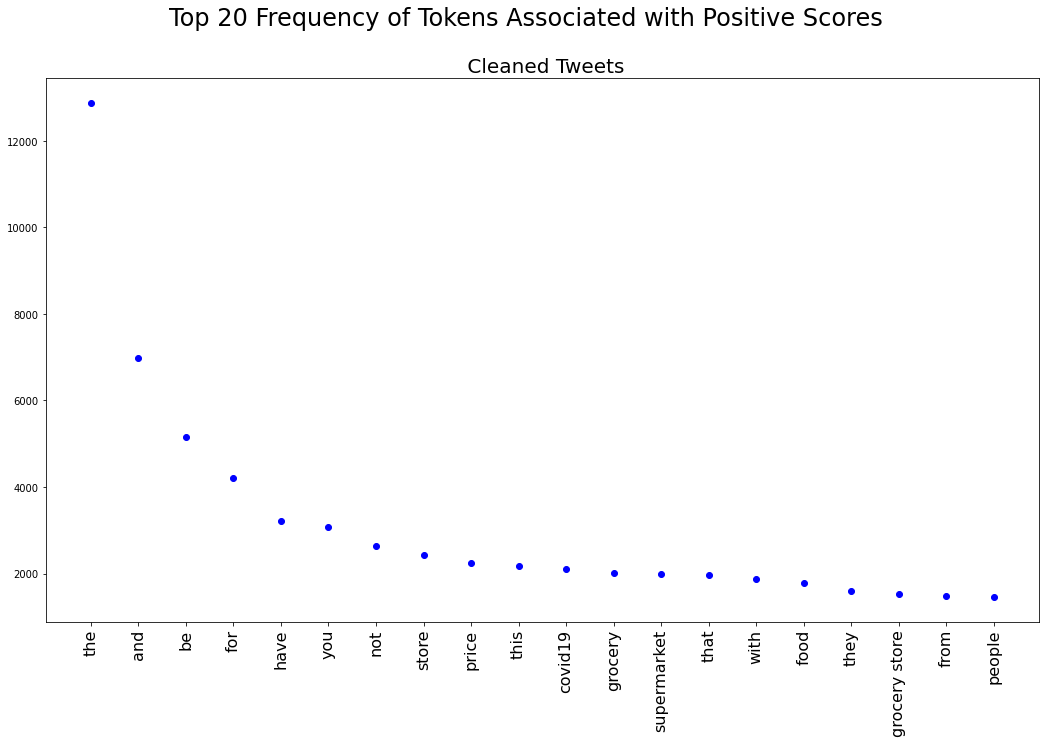

In [38]:
# Specify the top 20 tokens to plot
top_n = 20
term_freq_df_ac_Score = term_freq_df_ac_Score.head(20)

x = range(0, top_n)

fig, ax = plt.subplots(figsize = (17.8, 10))

fig.suptitle('Top 20 Frequency of Tokens Associated with Positive Scores', fontsize= 24)

# Plot x and tf using blue circle markers
ax.plot(x, term_freq_df_ac_Score["Positive freq"], 'bo')
ax.set_title(' Cleaned Tweets', fontsize= 20)
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
x_ticks_labels = term_freq_df_ac_Score.index
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=16)

# Adjust horizontal space
fig.subplots_adjust(hspace=1.5)
plt.show()

## 11. Convert the column of the Tweet_texts to a matrix of token counts using CountVectorizer and unigrams and bigrams.

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer with unigram and bigram
vectorizer = CountVectorizer(ngram_range=(1, 2))

# Fit and transform the Tweet_texts column
X_train_counts = vectorizer.fit_transform(df_train['Tweet_texts'])
X_test_counts = vectorizer.transform(df_test['Tweet_texts'])

# Show shape of the matrix
print("Train Data Shape:", X_train_counts.shape)
print("Test Data Shape:", X_test_counts.shape)

print("                                        ")

# Show sample feature names for processing efficiency
feature_names1 = vectorizer.get_feature_names_out()
print("Sample Feature Names:", feature_names1[:10])

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train Data Shape: (41138, 402275)
Test Data Shape: (3798, 402275)
                                        
Sample Feature Names: ['000' '000 000' '000 500' '000 861' '000 americans' '000 amp' '000 be'
 '000 because' '000 before' '000 business']


## 12. Perform the tf-idf analysis on the column of the Tweet_texts using Tfidfvectorizer.

In [40]:
# Create TfidfVectorizer with unigram and bigram
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000, stop_words='english')

# Fit and transform the Tweet_texts column
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['Tweet_texts'])
X_test_tfidf = tfidf_vectorizer.transform(df_test['Tweet_texts'])

# Display shape of the TF-IDF matrix
print("Train Data Shape (TF-IDF):", X_train_tfidf.shape)
print("Test Data Shape (TF-IDF):", X_test_tfidf.shape)

# Show sample feature names for processing efficiency
tfidf_feature_names1 = tfidf_vectorizer.get_feature_names_out()
print("Sample TF-IDF Features:", tfidf_feature_names1[:10])

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train Data Shape (TF-IDF): (41138, 10000)
Test Data Shape (TF-IDF): (3798, 10000)
Sample TF-IDF Features: ['000' '0808' '10' '10 pm' '100' '100 000' '100 bottle' '100 crore'
 '100 people' '1000']


## 13. Find the cosine similarity in Tweet_texts between the 200th and 20,000th tweets.

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

if len(df_train) > 20000:
    # Select the TF-IDF vectors of the 200th and 20,000th tweets
    tweet_200_tfidf = X_train_tfidf[199]
    tweet_20000_tfidf = X_train_tfidf[19999]

    # Compute cosine similarity
    similarity = cosine_similarity(tweet_200_tfidf, tweet_20000_tfidf)[0][0]

    print(f"Cosine Similarity between 200th and 20,000th tweet: {similarity:.4f}")

else:
    print("Dataset does not contain 20,000 tweets. Please check the data size.")

Cosine Similarity between 200th and 20,000th tweet: 0.0388


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 14. Find the corpus vector equal to the average of all the document vectors, where each document corresponds to a tweet or a row in this dataset.

In [42]:
# Corpus vector for training data
corpus_vector_train = np.mean(X_train_tfidf, axis=0).flatten()
print("Train Corpus Vector Shape:", corpus_vector_train.shape)

# Corpus vector for test data
corpus_vector_test = np.mean(X_test_tfidf, axis=0).flatten()
print("Test Corpus Vector Shape:", corpus_vector_test.shape)


Train Corpus Vector Shape: (1, 10000)
Test Corpus Vector Shape: (1, 10000)


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 15. Build the first model based on the training dataset using the random forests and pipeline.

In [43]:
# Select feature and target
X_train_text = df_train["Tweet_texts"]
y_train = df_train["Sentiment"]

# Encode category labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define pipeline: TF-IDF + Random Forest Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95, min_df=5)), 
    ('rf', RandomForestClassifier(n_estimators=500, random_state=42))
])

# Train the model on training data
pipeline.fit(X_train_text, y_train_encoded)

print("Model training completed successfully.")


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model training completed successfully.


## 16.Check the first model on the test dataset. Is it a good model based on the selected evaluation metrics? Please justify your answer.

In [44]:
df_test["category"] = df_test["Sentiment"].apply(lambda x: "Positive" if x == "Positive" else "Non-Positive")


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Extract test features and target
X_test_text = df_test["Tweet_texts"]
y_test = df_test["Sentiment"]

# Encode test labels if using categorical values
y_test_encoded = label_encoder.transform(y_test)

# Predict using the trained pipeline
y_pred = pipeline.predict(X_test_text)

# Compute Accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model Accuracy: 0.5047

Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.60      0.40      0.48       592
Extremely Positive       0.59      0.41      0.48       599
          Negative       0.49      0.46      0.47      1041
           Neutral       0.54      0.70      0.61       619
          Positive       0.43      0.54      0.48       947

          accuracy                           0.50      3798
         macro avg       0.53      0.50      0.51      3798
      weighted avg       0.52      0.50      0.50      3798


Confusion Matrix:
[[239   9 232  42  70]
 [ 16 245  45  20 273]
 [103  41 482 175 240]
 [  4  16  74 436  89]
 [ 35 101 157 139 515]]


## 17. Create the second model using pipeline, grid search CV for the hyperparameters for the estimators. (Please see all the potential parameters at Scikit Learn's TfidVectorizerLinks to an external site. and random forestsLinks to an external site..)

In [46]:
# Define feature and target
X_train_text = df_train["Tweet_texts"]
y_train = df_train["Sentiment"]

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define pipeline: TF-IDF + Random Forest
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'tfidf__max_df': [0.7, 0.85, 0.95],
    'tfidf__min_df': [1, 3, 5], 
    'tfidf__ngram_range': [(1,1), (1,2)],
    'rf__n_estimators': [100, 200, 300], 
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5], 
    'rf__min_samples_leaf': [1, 2]
}

# Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Train using GridSearchCV
grid_search.fit(X_train_text, y_train_encoded)

# Print best parameters and best accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print("="*50)
print("                ")
print(f"Best Model Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 300, 'tfidf__max_df': 0.7, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 1)}
                
Best Model Accuracy: 0.5297


## 18. Tune the second model and perform model diagnostics on the test dataset. Is it a good model? Please justify your answer.

In [47]:
# Extract test features and target
X_test_text = df_test["Tweet_texts"]
y_test = df_test["Sentiment"]

# Encode test labels
y_test_encoded = label_encoder.transform(y_test)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test_text)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model Accuracy: 0.5032

Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.61      0.40      0.48       592
Extremely Positive       0.64      0.41      0.50       599
          Negative       0.48      0.46      0.47      1041
           Neutral       0.55      0.65      0.59       619
          Positive       0.43      0.58      0.49       947

          accuracy                           0.50      3798
         macro avg       0.54      0.50      0.51      3798
      weighted avg       0.52      0.50      0.50      3798


Confusion Matrix:
[[235   9 238  33  77]
 [ 13 243  34  20 289]
 [109  31 479 161 261]
 [  3  10  88 402 116]
 [ 28  89 157 121 552]]


## 19. Build the third model using pipeline, grid search CV, hyperparameter for the following classifiers:
    - Logistic Regression
    - Random Forest
    - Support Vector Machine

In [48]:
# Define feature and target
X_train_text = df_train["Tweet_texts"]
y_train = df_train["Sentiment"]

# Encode target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define pipeline with a placeholder model (to be set dynamically in GridSearchCV)
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', RandomForestClassifier(random_state=42))  # Placeholder, will be overridden
])

# Define hyperparameter grid for all models
param_grid = [
    # Logistic Regression
    {
        'clf': [LogisticRegression(max_iter=1000, random_state=42)],
        'clf__C': [0.01, 0.1, 1, 10],  # Regularization strength
        'clf__solver': ['liblinear', 'saga']
    },
    # Random Forest
    {
        'clf': [RandomForestClassifier(random_state=42)],
        'clf__n_estimators': [100, 200, 500],
        'clf__max_depth': [10, 20, 50, None],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    },
    # Support Vector Machine (SVM)
    {
        'clf': [SVC(random_state=42)],
        'clf__C': [0.1, 1, 10, 100],
        'clf__kernel': ['linear', 'rbf', 'poly']
    },
]

# Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Train using GridSearchCV
grid_search.fit(X_train_text, y_train_encoded)

# Print best model and parameters
print(f"Best Model: {grid_search.best_estimator_}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Model Accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 128 candidates, totalling 640 fits


/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model: Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', SVC(C=1, kernel='linear', random_state=42))])
Best Parameters: {'clf': SVC(random_state=42), 'clf__C': 1, 'clf__kernel': 'linear'}
Best Model Accuracy: 0.5991


## 20. Tune the third model and perform model diagnostics on the test dataset. Is it a good model? Please justify your answer.

In [49]:
# Extract test features and target
X_test_text = df_test["Tweet_texts"]
y_test = df_test["Sentiment"]

# Encode test labels
y_test_encoded = label_encoder.transform(y_test)

# Use the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test_text)

# Compute evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_encoded, y_pred))

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model Accuracy: 0.5900

Classification Report:
                    precision    recall  f1-score   support

Extremely Negative       0.69      0.55      0.61       592
Extremely Positive       0.66      0.53      0.59       599
          Negative       0.56      0.56      0.56      1041
           Neutral       0.63      0.70      0.66       619
          Positive       0.53      0.62      0.57       947

          accuracy                           0.59      3798
         macro avg       0.61      0.59      0.60      3798
      weighted avg       0.60      0.59      0.59      3798


Confusion Matrix:
[[323   5 212  28  24]
 [  8 317  29   9 236]
 [118  28 583 131 181]
 [  6   9  85 435  84]
 [ 15 120 137  92 583]]


## 21. Generate the first topic model by setting five topics using LDA method and CountVectorizer.

In [50]:
# Create documents based on df_train data
#documents = df_train["Tweet_texts"].values.astype(str)

# Convert text into a document-term matrix using CountVectorizer
ct_vectorizer = CountVectorizer(stop_words='english', max_df=0.95, min_df=5)
document_term_matrix = ct_vectorizer.fit_transform(df_train["Tweet_texts"])

# Fit the LDA model
n_topics = 5  # Setting number of topics to 5 as per instruction
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(document_term_matrix)

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=5, random_state=42)

In [51]:
# Display top words for each topic
def display_top_words(model, feature_names, n_top_words=15):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print("=" * 80)
        

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
# Extract and display top words for each topic
feature_names_ct = ct_vectorizer.get_feature_names_out()
display_top_words(lda, feature_names_ct)

# Assign topics to each document
document_topic_matrix = lda.transform(document_term_matrix)
df_train["Topic"] = document_topic_matrix.argmax(axis=1)

# Display topic distribution
print(df_train["Topic"].value_counts())

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1:
supermarket, store, people, grocery, buy, food, panic, just, need, like, england, work, time, day, amp
Topic 2:
food, worker, demand, amp, supply, store, covid19, grocery, work, supermarket, help, need, stock, thank, people
Topic 3:
store, hand, grocery, sanitizer, paper, social, toilet, covid19, usa, distancing, consumer, san, amp, coronavirus, supermarket
Topic 4:
price, online, shopping, covid19, shop, delivery, covid, time, order, home, business, customer, gas, south, new
Topic 5:
price, consumer, covid19, new, oil, amp, pandemic, market, sanitizer, india, impact, hand, global, covid, coronavirus
0    12397
4    10857
1     6780
2     5564
3     5540
Name: Topic, dtype: int64


## 22. Plot the top 15 words for each topic for the model above.

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


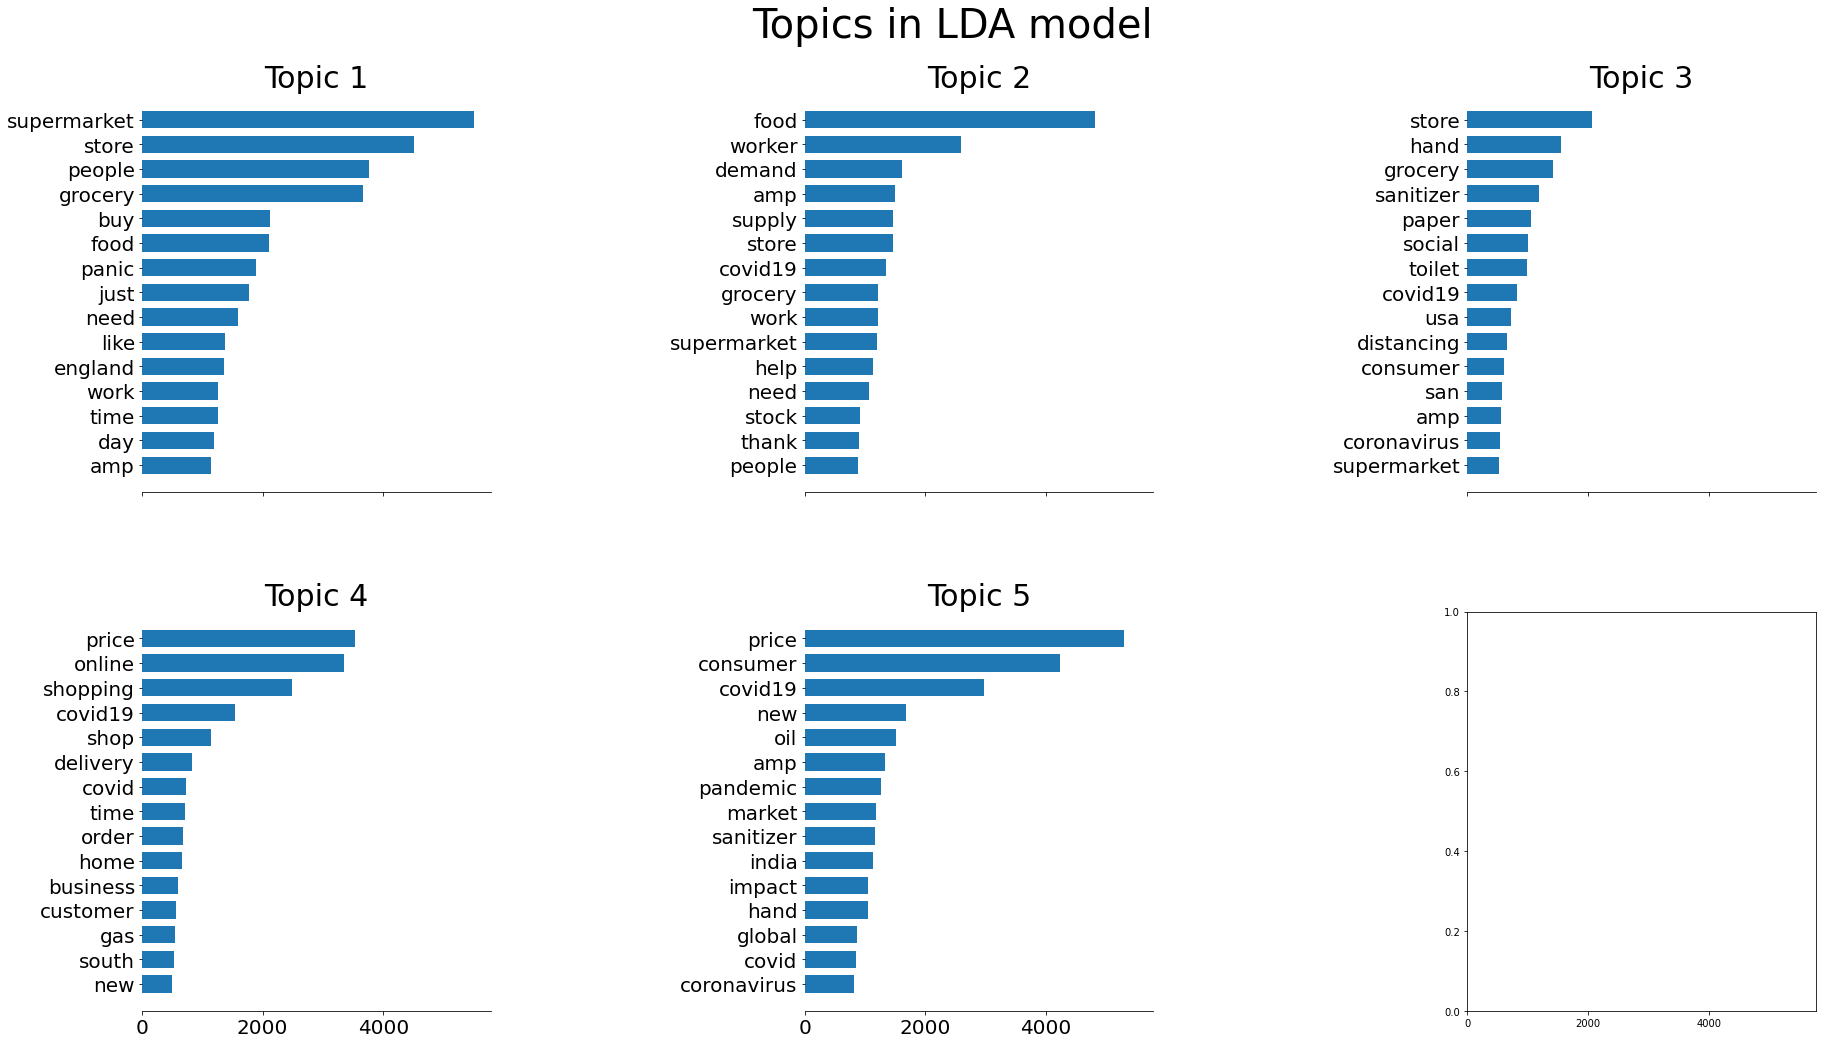

In [53]:
def plot_top_words(model, feature_names, n_top_words, title):
    
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    # Flatten the axes
    axes = axes.flatten()

    # Loop over all the topics
    for topic_idx, topic in enumerate(model.components_):
        # Rank the values and take out the corresponding indices
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        # Take out the top features using the indices
        top_features = [feature_names[i] for i in top_features_ind]
        # Get the weights
        weights = topic[top_features_ind]
        # Take out the axes from the flattened 1D vector
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}",
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        # Remove the top, right and left axis in matplotlib
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)

    fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Extract feature names from the vectorizer
ct_feature_names = ct_vectorizer.get_feature_names_out()

# Plot the top words
plot_top_words(lda, ct_feature_names, n_top_words=15, title="Topics in LDA model")

## 23. Generate the second topic model by setting five topics using LDA method and TfidfVectorizer.

In [54]:
# Create new document-term matrix using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english', 
    lowercase=True, 
    token_pattern=r'\b[a-zA-Z]{2,}\b', 
    max_df=0.9, 
    min_df=5
)

# Fit and transform the text data
document_word_matrix_tfidf = tfidf_vectorizer.fit_transform(df_train["Tweet_texts"])

# Build the LDA model with 5 topics
n_topics = 5
lda_tfidf = LatentDirichletAllocation(n_components=n_topics, random_state=101)
lda_tfidf.fit(document_word_matrix_tfidf)

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=5, random_state=101)

In [55]:
# Display top words for each topic
def display_top_words(model, feature_names, n_top_words=15):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print("=" * 80)

# Extract and display top words for each topic
feature_names_tv = tfidf_vectorizer.get_feature_names_out()
display_top_words(lda_tfidf, feature_names_tv)

# Assign topics to each document
document_topic_matrix_tfidf = lda_tfidf.transform(document_word_matrix_tfidf)
df_train["Topic_tfidf"] = document_topic_matrix_tfidf.argmax(axis=1)

# Display topic distribution
print(df_train["Topic_tfidf"].value_counts())

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1:
supermarket, store, grocery, people, price, new, usa, amp, work, consumer, scam, time, say, online, coronavirus
Topic 2:
grocery, hand, store, sanitizer, worker, work, thank, make, supermarket, los, angeles, mask, amp, employee, staff
Topic 3:
online, store, shopping, price, grocery, amp, shop, help, covid, supermarket, home, consumer, stay, people, mask
Topic 4:
price, consumer, demand, food, oil, impact, pandemic, new, market, india, amp, increase, supply, crisis, global
Topic 5:
supermarket, food, people, panic, toilet, buy, paper, need, england, just, store, shelf, grocery, shop, stock
3    10992
4     9264
2     8039
0     6588
1     6255
Name: Topic_tfidf, dtype: int64


## 24. Plot the top 15 words for each topic for the second model above.

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


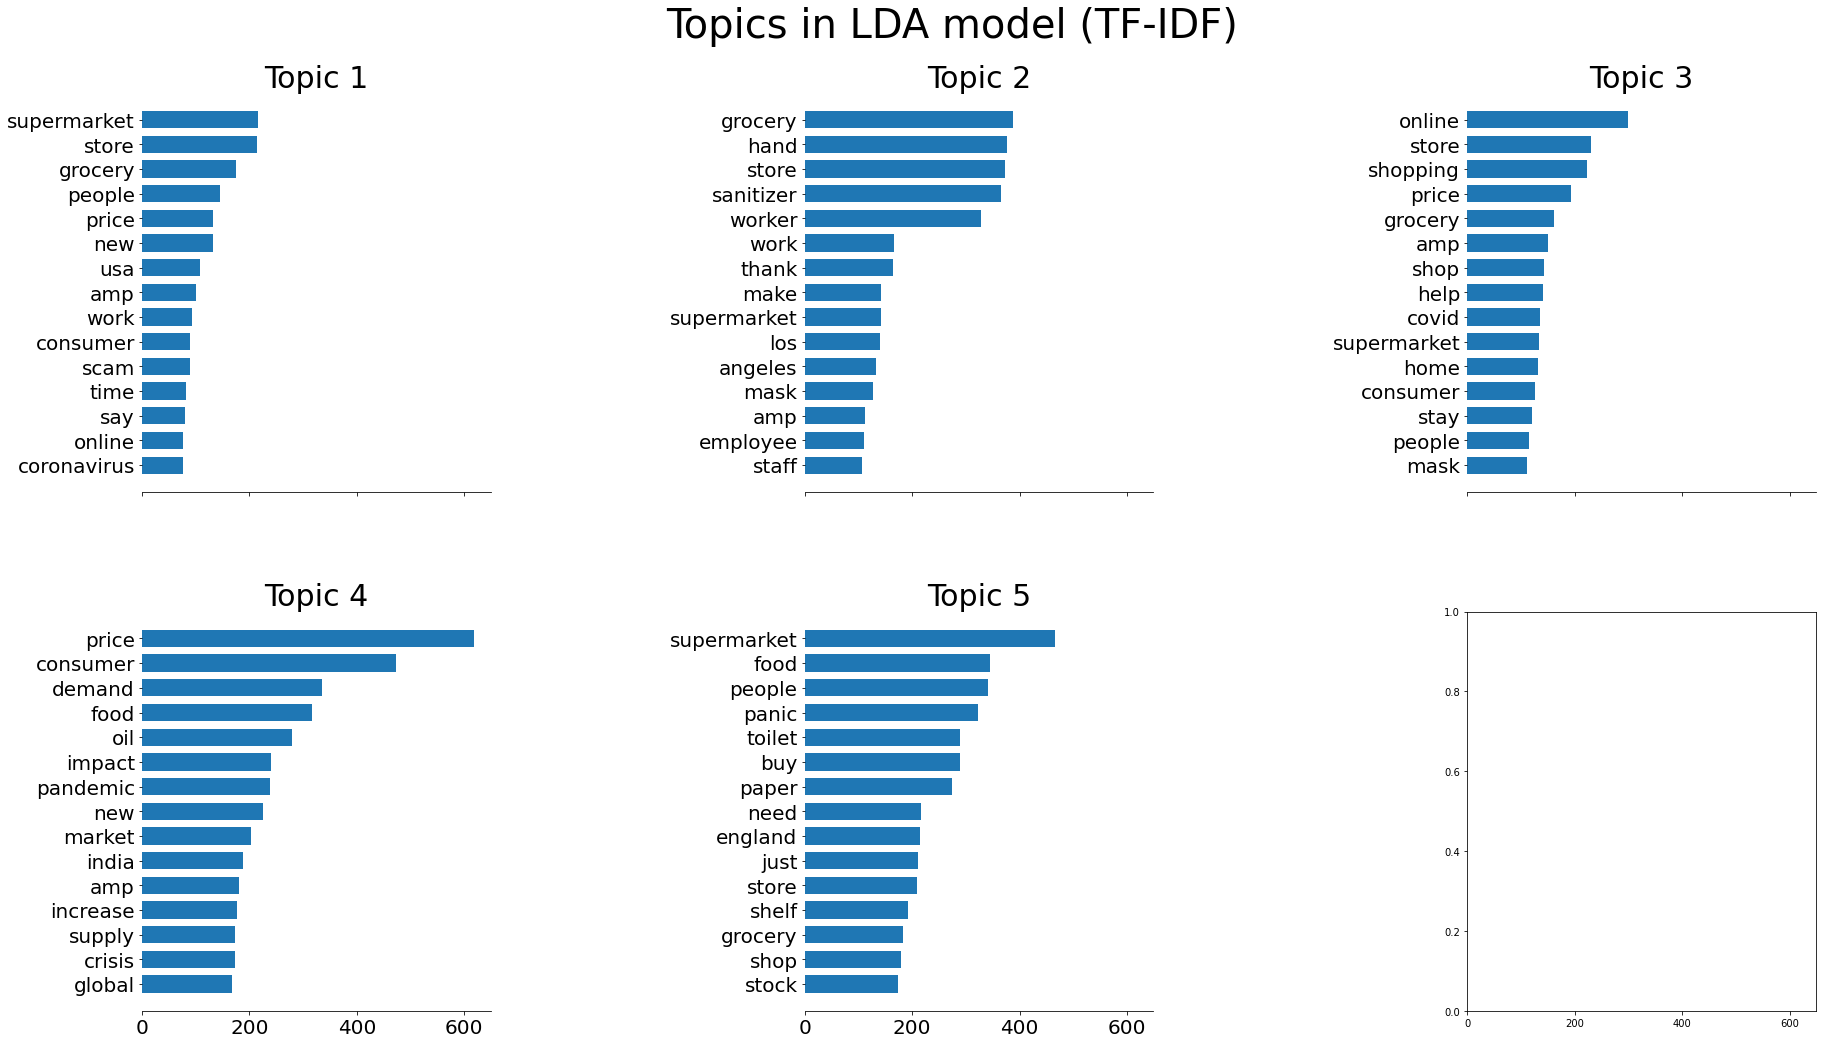

In [56]:
# Plot the top words
plot_top_words(lda_tfidf, feature_names_tv, n_top_words=15, title="Topics in LDA model (TF-IDF)")


## 25. Visualize the second topic model using the dimension reduction method.

/Users/matthewmoore/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


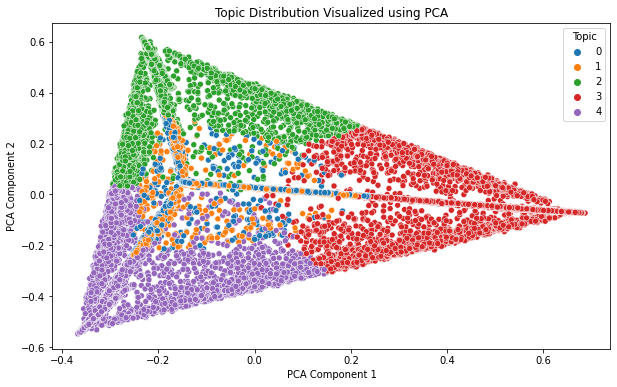

In [57]:
# Get topic distributions for each document
topic_weights = lda_tfidf.transform(document_word_matrix_tfidf)

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
topic_pca = pca.fit_transform(topic_weights)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=topic_pca[:, 0], y=topic_pca[:, 1], hue=topic_weights.argmax(axis=1), palette="tab10")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Topic Distribution Visualized using PCA")
plt.legend(title="Topic")
plt.show()